<a href="https://colab.research.google.com/github/coader-128/Tensorflow/blob/Transfer_Learning/Transfer_Learning_006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer learning  :: Feature Extraction

Transfer learning id leveraging a working models exhisting architecture and learn pattern for our own problem



## Downliading and becomimg one with data

In [1]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-09-28 14:27:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.207, 173.194.197.207, 64.233.191.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   153MB/s    in 1.0s    

2023-09-28 14:27:57 (153 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
import zipfile

zip_data = zipfile.ZipFile("/content/10_food_classes_10_percent.zip")

zip_data.extractall()
zip_data.close()

In [3]:
# walking through the dataset

import os

for dirpath , dirnames , filenames in os.walk("10_food_classes_10_percent"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ." )



there are 2 directories and 0 images in 10_food_classes_10_percent .
there are 10 directories and 0 images in 10_food_classes_10_percent/test .
there are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger .
there are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice .
there are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings .
there are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen .
there are 0 directories and 250 images in 10_food_classes_10_percent/test/steak .
there are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi .
there are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza .
there are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry .
there are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon .
there are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream 

## Creating dataset

In [9]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)

test_datagen = ImageDataGenerator(rescale = 1/255.)


train_data = train_datagen.flow_from_directory(train_dir ,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical",
                                               color_mode = "rgb",
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(test_dir ,
                                              target_size = (224,224),
                                              class_mode = "categorical",
                                              batch_size = 32,
                                              color_mode = "rgb",
                                              shuffle = True)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Setting up calbacks(things to run whilst our model trains)

* Callbacks are extra functionality with the **TensorBoard** callbacks
* Model checkpoint with **ModelCheckpoint** callback
* Stopping a model from training (before it trains too long and overfits) with **EarlyStopping** callbacks


In [30]:
# Create tensorboard call back
import tensorflow as tf
import datetime

def create_tensorboard_callback(dir_name , experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving Tensorboard log file to {log_dir}")
  return tensorboard_callback



## creating model with tensor flow hub

In the past we have used to create model from scratch

now we will access pre trained model from tensorflowhub

check the tensorflowhub to find pre trained model for the work domain

we got "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [19]:
# lets compare two model

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

efficient_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [20]:
# import dependencies

import tensorflow_hub as hub
from tensorflow.keras import layers



In [25]:

def create_model(model_url , num_classes = 10):
  """takes as tendorflow hub url and create keras sequential model with it

  args:
    model_url - tf hub feature extraction url
    num_classes = number pf targer classes

  returns a uncompiled keras sequential model as  feature extractor layer and dense output layers with num_classes

    """
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable= False,  # freeze already learn layer
                                           name = "Feature_extraction_layer",
                                           input_shape = (224,224,3))

  # create our own model
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes , activation = "softmax" , name = "output_layer")
  ])

  return model


### Creating resnet tensorflow hub feature extracting model

In [26]:
resnet_model = create_model(resnet_url,
                            num_classes = 10)

In [28]:
# compile our model

resnet_model.compile(loss = "categorical_crossentropy",
                     optimizer  = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])


In [32]:
history = resnet_model.fit(train_data , epochs = 5 ,
                 steps_per_epoch = len(train_data),
                 validation_data = test_data,
                 validation_steps = len(test_data),
                 callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub" ,
                                                          experiment_name= "resnet_v2_50")])




Saving Tensorboard log file to tensorflow_hub/resnet_v2_50/20230928-153807
Epoch 1/5
24/24 [==============================] - 10s 430ms/step - loss: 0.3320 - accuracy: 0.9320 - val_loss: 0.6688 - val_accuracy: 0.7800
Epoch 2/5
24/24 [==============================] - 11s 448ms/step - loss: 0.2757 - accuracy: 0.9493 - val_loss: 0.6596 - val_accuracy: 0.7872
Epoch 3/5
24/24 [==============================] - 11s 454ms/step - loss: 0.2345 - accuracy: 0.9627 - val_loss: 0.6470 - val_accuracy: 0.7840
Epoch 4/5
24/24 [==============================] - 11s 459ms/step - loss: 0.1983 - accuracy: 0.9733 - val_loss: 0.6437 - val_accuracy: 0.7872
Epoch 5/5
24/24 [==============================] - 11s 452ms/step - loss: 0.1742 - accuracy: 0.9840 - val_loss: 0.6398 - val_accuracy: 0.7828


In [ ]:
history.history

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def loss_curves(history):
  plt.figure(figsize = (8,4))
  epochs = np.arange(len(history.history['loss']))

  plt.subplot(1,2,1)
  plt.plot(epochs , history.history['loss'] , label = "training")
  plt.plot(epochs , history.history['val_loss'] , label = "validation")
  plt.title("loss curves")
  plt.xlabel("epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs , history.history['accuracy'])
  plt.plot(epochs , history.history['val_accuracy'])
  plt.xlabel("epochs")
  plt.title("accuracy curves")
  plt.legend(["train","validation"])







[0 1 2 3 4]


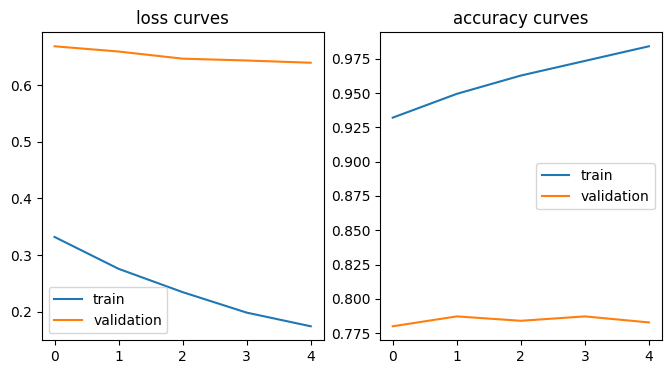

In [53]:
loss_curves(history)

### Creating efficientnet tensorflow hub feature extracting model

In [62]:
efficientnet_model = create_model(efficient_url,
                            num_classes = 10)

resnet_model.compile(loss = "categorical_crossentropy",
                     optimizer  = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

efficient_history = resnet_model.fit(train_data , epochs = 5 ,
                 steps_per_epoch = len(train_data),
                 validation_data = test_data,
                 validation_steps = len(test_data),
                 callbacks = [create_tensorboard_callback(dir_name = "tensorflow_hub" ,
                                                          experiment_name= "efficientnet_b0")])



Saving Tensorboard log file to tensorflow_hub/efficientnet_b0/20230928-155819
Epoch 1/5
24/24 [==============================] - 13s 464ms/step - loss: 0.0584 - accuracy: 0.9973 - val_loss: 0.6430 - val_accuracy: 0.7912
Epoch 2/5
24/24 [==============================] - 10s 422ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.6651 - val_accuracy: 0.7940
Epoch 3/5
24/24 [==============================] - 11s 450ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 0.6602 - val_accuracy: 0.7936
Epoch 4/5
24/24 [==============================] - 10s 446ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.6659 - val_accuracy: 0.7960
Epoch 5/5
24/24 [==============================] - 11s 452ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.6733 - val_accuracy: 0.7964


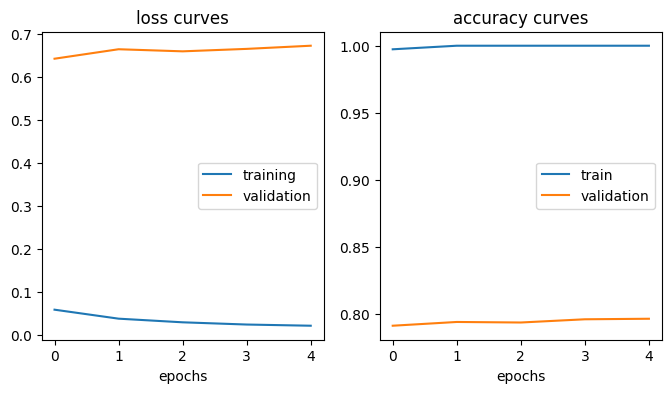

In [63]:
loss_curves(efficient_history)

## Different types of transfer learning
* "As in " transfer learning - using an exhisting moel with no changes what so ever (e.g using ImageNet model on 1000 InageNet classes , none of ur own)

* "Feature Extraction" transfer learning - use the pre learned pattern of an exhisting model (Eg EfficientNet50 trained on Imagenet) and adjust the output layer for your own problem (eg 1000 classes 0> 10 classes of food)

* "Fine tuning" - transfer learning use the pre learned pattern of exhisting model and fine tune many or all of the underlying layers(including the new output layers)

## Comparing our model using tensorboard


In [68]:
# upload transboard dev records

!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs ResNet50V2" \
  --description "Comaring two model" \
  --one_shot

2023-09-28 16:26:33.080125: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/VQRNxEC7T4iJNfMu1L0Gxg/

[2023-09-28T16:26:35] Started scanning logdir.
[2023-09-28T16:26:38] Total uploaded: 120 scalars, 0 tensors, 4 binary objects (7.2 MB)
[2023-09-28T16:26:38] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/VQRNxEC7T4iJNfMu1L0Gxg/


In [ ]:
# our tensor board is uploaded

In [69]:
#check out what tensorboard experiment ypu have
! tensorboard dev list

2023-09-28 16:26:51.643588: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/VQRNxEC7T4iJNfMu1L0Gxg/
	Name                 EfficientNetB0 vs ResNet50V2
	Description          Comaring two model
	Id                   VQRNxEC7T4iJNfMu1L0Gxg
	Created              2023-09-28 16:26:35 (18 seconds ago)
	Updated              2023-09-28 16:26:38 (15 seconds ago)
	Runs                 8
	Tags                 5
	Scalars              120
	Tensor bytes         0
	Binary object bytes  7518024
Total: 1 experiment(s)


In [66]:
# delete an experiment

! tensorboard dev delete --experiment_id wb1PWBaESDSqYBQFGxPqIQ

2023-09-28 16:26:16.810569: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Deleted experiment wb1PWBaESDSqYBQFGxPqIQ.
